In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab


In [3]:
df = pd.read_csv('winequality-red.csv')
df = df.loc[df['quality'] >=6]

In [4]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     855.000000        855.000000   855.000000      855.000000   
mean        8.474035          0.474146     0.299883        2.535965   
std         1.862795          0.161999     0.199889        1.424835   
min         4.700000          0.120000     0.000000        0.900000   
25%         7.100000          0.350000     0.115000        1.900000   
50%         8.000000          0.460000     0.310000        2.200000   
75%         9.650000          0.580000     0.460000        2.600000   
max        15.600000          1.040000     0.780000       15.400000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  855.000000           855.000000            855.000000  855.000000   
mean     0.082661            15.272515             39.352047    0.996467   
std      0.037258            10.038538             27.253280    0.002067   
min      0.012000             1.000000              6.00

In [5]:
print(df.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.282159     0.696876   
volatile acidity          -0.282159          1.000000    -0.578030   
citric acid                0.696876         -0.578030     1.000000   
residual sugar             0.114460          0.006655     0.161854   
chlorides                  0.125953          0.074512     0.154334   
free sulfur dioxide       -0.218638          0.015968    -0.149503   
total sulfur dioxide      -0.176359          0.068155    -0.048526   
density                    0.699443          0.026408     0.371560   
pH                        -0.728341          0.284919    -0.592169   
sulphates                  0.215061         -0.232230     0.264703   
alcohol                   -0.154082         -0.146935     0.095745   
quality                    0.105616         -0.232365     0.217669   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [6]:
#Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
Features = df[list(df.columns)[:-1]]
Quality = df['quality']
Features_train, Features_test, Quality_train, Quality_test = train_test_split(Features, Quality)

/Users/alanaking/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ols_model = sm.OLS(Quality_test, Features_test, missing='drop')
    ols_results = ols_model.fit()
    print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3896.
Date:                Tue, 24 Apr 2018   Prob (F-statistic):          1.63e-229
Time:                        11:06:08   Log-Likelihood:                -124.45
No. Observations:                 214   AIC:                             270.9
Df Residuals:                     203   BIC:                             307.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
fixed acidity           -0.0285 

In [8]:
Quality_predictions = ols_results.predict(Features_test)

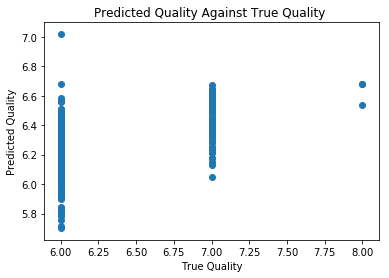

In [9]:
plt.scatter(Quality_test, Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()

In [10]:
df2 = pd.read_csv('winequality-white.csv', sep = ';')

IOError: File winequality-white.csv does not exist

In [17]:
print(df2.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [18]:
White_Features = df[list(df.columns)[:-1]]
White_Quality = df['quality']
White_Features_train, White_Features_test, White_Quality_train, White_Quality_test = train_test_split(White_Features, White_Quality)

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    white_results = sm.OLS(White_Quality_test, White_Features_test, missing='drop')
    white_results = white_results.fit()
    print(white_results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2694.
Date:                Thu, 12 Apr 2018   Prob (F-statistic):               0.00
Time:                        00:16:00   Log-Likelihood:                -394.81
No. Observations:                 400   AIC:                             811.6
Df Residuals:                     389   BIC:                             855.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0136 

In [32]:
Quality_predictions = white_results.predict(White_Features_test)

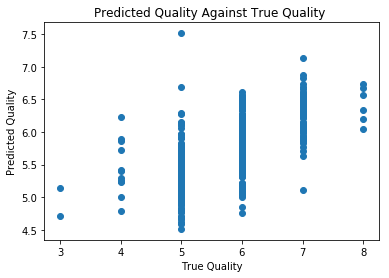

In [34]:
plt.scatter(White_Quality_test, White_Quality_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()